Case study 2:  particle-particle bridge
===

TODO: Add link to paper in each header

#### The first few cells in this notebook define the imports, physical and numerical parameters used in the case study. The parameters can be modified by the user to produce new results.

In [7]:
# Imports and physical parameters
import numpy as np
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import *
from matplotlib.widgets import Slider

# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from hyperct import Complex
from ddgclib import *
from hyperct import *
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._capillary_rise_flow import * #plot_surface#, curvature
from ddgclib._hyperboloid import *
from ddgclib._catenoid import *
from ddgclib._ellipsoid import *
from ddgclib._eos import *
from ddgclib._misc import *
from ddgclib._plotting import *
#from ddgclib._case2 import *

# Parameters for a water droplet in air at standard laboratory conditions
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

# Numerical parameters #Stated this is what to plaay
r = 1
theta_p = 20 * np.pi/180.0  # rad, three phase contact angle
refinement=2# NOTE: 2 is the minimum refinement needed for the complex to be manifold

In order to understand how to understand how the surfaces are construct consider the parametric surface function $f(u, v): \mathbb{R}^2 \rightarrow \mathbb{R}^3 $ that maps the Catenoid from a domain $u \in [0, 2\pi)$, $v \in 1]$ to the three dimensional points $(x, y, z) \in \mathbb{R}^3$ given by
\begin{gathered}
x=q \cosh \left(\frac{v}{q}\right) \cos u \\
y=q \cosh \left(\frac{v}{q}\right) \sin u \\
z=v
\end{gathered}

Many other general surface have similar parameterizations and this can be used in the code by supplying a new parameterization function. By first triangulating the plane of parameterizations itself we can more precisely refine the triangulation of the final surface we have in 3D space:

/home/endres/iwt-projects/ddg/ddgclib/ddgclib/_complex.py:2831: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>, None, None)

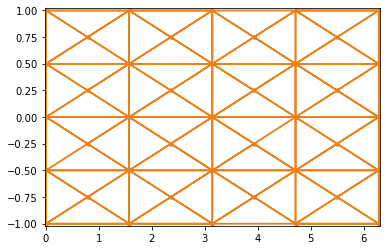

In [8]:
# TODO: Explain plane projection
# Explain how to project to other surfaces
# Exlain here projectio nto catenoid
domain = [(0.0, 2 * np.pi),  # u
          (-1, 1)  # v
              ]
HC_plane = Complex(2, domain)
HC_plane.triangulate()
for i in range(refinement):
    HC_plane.refine_all()
    
HC_plane.plot_complex(surface_plot=False, surface_field_plot=False)

The number of simplices in the symmetric triangulation above can be lowered or increased using the `refinement` variable. In the manuscript we used the catenoid as our analytical comparison, a descretized catenoid from the mapping function can be produced using `catenoid_N` which simply loops over all the points generated in a given `HC_plane` refinment and then reconstructs the connections in 3D space. Note that because $u$ is modular the vertices on the boundaries of the 2D $u$ axis are the same points in 3D space:

In [9]:
a, b, c = 1, 0.0, 1  # Geometric parameters of the catenoid; can also be modified
abc = (a, b, c)
HC, bV, K_f, H_f, neck_verts, neck_sols = catenoid_N(r, theta_p, gamma, abc, refinement=refinement,
                                                     cdist=1e-5, equilibrium=True)

This function outputs the simplicial complex object `HC`, the boundary vertices `bV`, and the analytical solutions of the Guassian and the mean normal curvature, `K_f` and `H_f` respectively, which will be used later in this notebook.

As always we can vasualize the resulting complex object `HC` using the `.plot_complex` method of the `Complex` class:

/home/endres/iwt-projects/ddg/ddgclib/ddgclib/_complex.py:2764: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.ax_complex = Axes3D(self.fig_complex)
/home/endres/iwt-projects/ddg/ddgclib/ddgclib/_complex.py:2831: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 432x288 with 1 Axes>, <Axes3D:>, None, None)

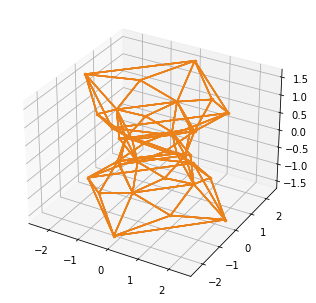

In [10]:
# Plot the complex HC:
HC.plot_complex(surface_plot=False, surface_field_plot=False)

At every vertex ther eis an associated Guassian curvature curvature, the vector of guarrias can retreieved 

In [4]:
K_f

[-1.0,
 -1.0,
 -0.3559146266426895363,
 -0.3559146266426895363,
 -0.3559146266426895363,
 -0.3559146266426895363,
 -1.0,
 -0.3559146266426895363,
 -0.3559146266426895363,
 -0.11904692767130050836,
 -0.7596516529033755972,
 -0.11904692767130050836,
 -0.7596516529033755972,
 -0.3559146266426895363,
 -0.3559146266426895363,
 -1.0,
 -0.11904692767130050836,
 -0.7596516529033755972,
 -0.11904692767130050836,
 -0.7596516529033755972,
 -0.11904692767130050836,
 -0.7596516529033755972,
 -0.11904692767130050836,
 -0.7596516529033755972,
 -0.7596516529033755972,
 -0.11904692767130050836,
 -0.7596516529033755972,
 -0.11904692767130050836,
 -0.3559146266426895363,
 -0.11904692767130050836,
 -0.11904692767130050836,
 -0.063472021508763489985,
 -0.21264918110766402047,
 -0.063472021508763489985,
 -0.21264918110766402047,
 -1.0,
 -0.7596516529033755972,
 -0.7596516529033755972,
 -0.3559146266426895363,
 -0.5477086342512881744,
 -0.93248302226188393234,
 -0.5477086342512881744,
 -0.9324830222618839323

As in the first case study we can again make use of the `int_curvatures` function to compute all the curvatures at every vertex used in this case study.

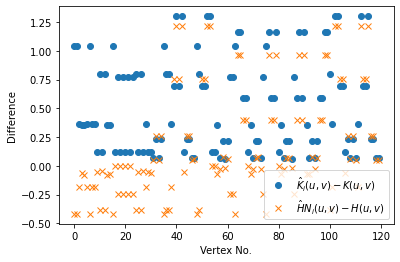

In [6]:
# Compute all curvatures:
(HNda_v_cache, K_H_cache, C_ijk_v_cache, HN_i,  HNdA_ij_dot_hnda_i,
     K_H_2, HNdA_i_Cij) = int_curvatures(HC, bV, r, theta_p, printout=0)

# Process the results:
c_outd2 = []  #TODO not needed?
HN_i_2 = []
HNdA_i_list = []
C_ij_i_list = []
for v in HC.V:
    if v in bV:
        continue
    nullp = np.zeros(3)
    nullp[2] = v.x_a[2]
    N_f0 = v.x_a - nullp  # First approximation of normal vectors
    N_f0 = normalized(N_f0)[0]
    F, nn = vectorise_vnn(v)
    c_outd2 = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
    HN_i_2.append(c_outd2['HN_i'])
    HNdA_i_list.append(c_outd2['HNdA_i'])
    C_ij_i_list.append(c_outd2['C_ij'])

# Plot results
K_f = np.array(K_f)
H_f = np.array(H_f)
plt.figure()
yr = K_H_2 - K_f
xr = list(range(len(yr)))
plt.plot(xr, yr, 'o', label='$\hat{K}_i(u, v) - K(u, v)$')
yr = HNdA_ij_dot_hnda_i - H_f
plt.plot(xr, yr, 'x', label='$\hat{H}N_i(u, v)  - H(u, v)$')

# Subtract the analytical solution from the numerical output:
yr = HN_i_2 -  H_f

l_hnda_i_cij = []
for hnda_i_cij in HNdA_i_Cij:
    l_hnda_i_cij.append(np.sum(hnda_i_cij))

yr = l_hnda_i_cij - H_f
plt.ylabel('Difference')
plt.xlabel('Vertex No.')
plt.legend()

In [7]:
# Note that the total number of vertices in the simplicial complex can found using the .size() method:
HC.V.size()

136

While this provides us with the _point-wise_ errors at each vertex, we are also interested in the _total integrated_ error over the entire liquid-bridge. Imbalances is what results in the physical surface tension forces. For the Catenoid we expect values close to zero (exactly zero at the analytical solution): 

In [8]:
# Sum all the curvature tensor errors in the postive 'upwards' direction
sum_HNdA_i = 0.0
for hndA_i, c_ij in zip(HNdA_i_list, C_ij_i_list):
    hndA_i_c_ij = hndA_i / np.sum(c_ij)
    sum_HNdA_i += np.dot(hndA_i_c_ij, [0, 0, 1])

# Print out results:
print(f'Number of vertices in the complex: {HC.V.size()}')  # 
print(f'Number of boundary vertices in the complex: {len(bV)}')  # n
print(f'Integrated curvature sum_HNdA_i in (0, 0, 1) direction = {sum_HNdA_i}')

# Sum all the curvature tensor errors in the negative 'upwards' direction
for hndA_i, c_ij in zip(HNdA_i_list, C_ij_i_list):
    hndA_i_c_ij = hndA_i / np.sum(c_ij)
    sum_HNdA_i += np.dot(hndA_i_c_ij, [0, 0, -1])

print(f'Integrated curvature sum_HNdA_i in (0, 0, -1) direction = {sum_HNdA_i}')

# Compute the geometric error
max_int_e = 0.0
ern = 0.0
for v in bV:
    for v2 in v.nn:
        if v2 in bV:  # Explain
            a = v.x_a
            b = v2.x_a
            break
    ern = 0.5 * numpy.linalg.norm(a - b) ** 2
    max_int_e = ern
    break

#erange.append(max_int_e / r)
print(f'geo erange = {ern }')


Number of vertices in the complex: 136
Number of boundary vertices in the complex: 16
Integrated curvature sum_HNdA_i in (0, 0, 1) direction = 2.904848670631788e-16
Integrated curvature sum_HNdA_i in (0, 0, -1) direction = 8.131516293641283e-20
geo erange = 1.6208215733413345


TODO: Wrap this in a function

# Comparing errors for different refinements 

By changing the `refinement` parameter with in the first cell, we can recompute the curvatures for different refinements of the bridge. While individual values of the `hndA_i` estimates of the curvature tensors are usually non-zero, it is expected that the total integrals of the point-wise curvature estimates should always sum to a value near zero for the Catenoid as in the loop above.

The following data can be collected by repeating the calculations above (note that floating point accuracy of the numpy build (LAPLACK vs. ATLAS) on your systems could produce slightly different results):

```python 
Nlist = [8, 16, 32, 64]  # Number of BOUNDARY Vertices
N_total = [36, 136, 528, 2080]  # Total number of vertices 

lp_error = [0, 0, 0, 0]
lp_error = np.array(lp_error) +  np.random.rand(4) * 4 *np.random.rand(4) * 1e-12

lp_error = [4.5902409477605044e-17,
            2.4001525593397854e-16,
            -3.5415463964239e-16,
            -1.652188585596348e-16
            ]
lp_error_2 = [-4.0657581468206416e-20,
              -6.2341624917916505e-19,
               2.710505431213761e-19,
               5.624298769768554e-18
              ]
# geo_erro should be proportion to area based
#geo_error = [a/(2**2+1), a/(2**3+1), a/(2**4+1), a/(2**5+1)]  # area based
geo_error = [5.533830997888883,
             1.6208215733413345,
             0.4212378025628348,
             0.1063310109203463

             ]
```

The cell below contains one possible loop for 4 different refinements that can produce the results shown above. Note that this cell takes a long time to run for the later vertices.

In [9]:
refinements =  [2, 3, 4, 5]   # NOTE: 2 is the minimum refinement needed for the complex to be manifold

# data containers:
lp_error = []
lp_error_2 = []
geo_error = []
Nlist = []

# Loop over refinements
for refinement in refinements:
    # Construct the new Catenoid
    a, b, c = 1, 0.0, 1  # Geometric parameters of the catenoid
    abc = (a, b, c)
    HC, bV, K_f, H_f, neck_verts, neck_sols = catenoid_N(r, theta_p, gamma, abc, refinement=refinement,
                                                         cdist=1e-5, equilibrium=True)
    # Compute all curvatures:
    (HNda_v_cache, K_H_cache, C_ijk_v_cache, HN_i,  HNdA_ij_dot_hnda_i,
         K_H_2, HNdA_i_Cij) = int_curvatures(HC, bV, r, theta_p, printout=0)

    # Process the results:
    c_outd2 = []  #TODO not needed?
    HN_i_2 = []
    HNdA_i_list = []
    C_ij_i_list = []
    for v in HC.V:
        if v in bV:
            continue
        nullp = np.zeros(3)
        nullp[2] = v.x_a[2]
        N_f0 = v.x_a - nullp  # First approximation of normal vectors
        N_f0 = normalized(N_f0)[0]
        F, nn = vectorise_vnn(v)
        c_outd2 = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
        HN_i_2.append(c_outd2['HN_i'])
        HNdA_i_list.append(c_outd2['HNdA_i'])
        C_ij_i_list.append(c_outd2['C_ij'])


    # Sum all the curvature tensor errors in the postive 'upwards' direction
    sum_HNdA_i = 0.0
    for hndA_i, c_ij in zip(HNdA_i_list, C_ij_i_list):
        hndA_i_c_ij = hndA_i / np.sum(c_ij)
        sum_HNdA_i += np.dot(hndA_i_c_ij, [0, 0, 1])

    # Print out results:
    print(f'Number of vertices in the complex: {HC.V.size()}')  #
    print(f'Number of boundary vertices in the complex: {len(bV)}')  # n
    print(f'Integrated curvature sum_HNdA_i in (0, 0, 1) direction = {sum_HNdA_i}')

    lp_error.append(sum_HNdA_i)
    # Sum all the curvature tensor errors in the negative 'upwards' direction
    for hndA_i, c_ij in zip(HNdA_i_list, C_ij_i_list):
        hndA_i_c_ij = hndA_i / np.sum(c_ij)
        sum_HNdA_i += np.dot(hndA_i_c_ij, [0, 0, -1])

    lp_error_2.append(sum_HNdA_i)
    print(f'Integrated curvature sum_HNdA_i in (0, 0, -1) direction = {sum_HNdA_i}')

    # Compute the geometric error
    max_int_e = 0.0
    ern = 0.0
    for v in bV:
        for v2 in v.nn:
            if v2 in bV:  # Explain
                a = v.x_a
                b = v2.x_a
                break
        ern = 0.5 * numpy.linalg.norm(a - b) ** 2
        max_int_e = ern
        break

    print(f'geo erange = {ern }')
    geo_error.append(ern)
    
    # Append number of boundary vertices:
    Nlist.append(len(bV))


Number of vertices in the complex: 36
Number of boundary vertices in the complex: 8
Integrated curvature sum_HNdA_i in (0, 0, 1) direction = 4.4967285103836296e-17
Integrated curvature sum_HNdA_i in (0, 0, -1) direction = -8.131516293641283e-20
geo erange = 5.533830997888883
Number of vertices in the complex: 136
Number of boundary vertices in the complex: 16
Integrated curvature sum_HNdA_i in (0, 0, 1) direction = 2.904848670631788e-16
Integrated curvature sum_HNdA_i in (0, 0, -1) direction = 8.131516293641283e-20
geo erange = 1.6208215733413345
Number of vertices in the complex: 528
Number of boundary vertices in the complex: 32
Integrated curvature sum_HNdA_i in (0, 0, 1) direction = -5.408542537443939e-16
Integrated curvature sum_HNdA_i in (0, 0, -1) direction = 1.3552527156068805e-18
geo erange = 0.4212378025628348
Number of vertices in the complex: 2080
Number of boundary vertices in the complex: 64
Integrated curvature sum_HNdA_i in (0, 0, 1) direction = 6.839282829310123e-16
In

Finally we plot the data:

y=-1.904895x+(2.481425)


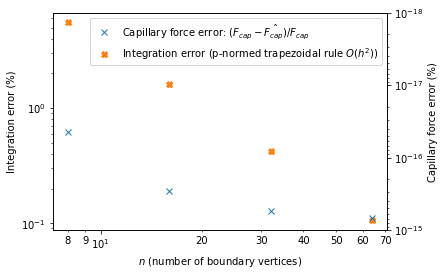

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax2 = ax.twinx()
ln1 = ax2.loglog(Nlist, np.abs(lp_error), 'x', color='tab:blue',
             label='Capillary force error: $(F_{cap} - \hat{F_{cap}}) / F_{cap} $')

ax2.set_ylabel(r'Capillary force error (%)')
ax.set_xlabel(r'$n$ (number of boundary vertices)')

ln2 = ax.loglog(Nlist, geo_error, 'X', color='tab:orange',
          label='Integration error (p-normed trapezoidal rule $O(h^2)$)')

ax.set_ylabel(r'Integration error (%)')

ax2.set_ylim([1e-15, 1e-18])
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.tick_params(axis='y', which='minor')

x, y = Nlist, geo_error
x, y = np.float32(x), np.float32(y)
z = numpy.polyfit(x, y, 1)
z = np.polyfit(np.log10(x), np.log10(y), 1)

p = numpy.poly1d(z)
p = np.poly1d(z)
# the line equation:
print("y=%.6fx+(%.6f)" % (z[0], z[1]))

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.tick_params(axis='y', which='minor')
from matplotlib import pyplot as plt, ticker as mticker

ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax2.xaxis.set_minor_formatter(mticker.ScalarFormatter())